In [61]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import os
from PIL import Image
import cv2
import pandas as pd
import seaborn as sns

In [62]:
images=[]
age=[]
for filename in os.listdir('drive/MyDrive/baithi/age_data/train')[0:9700]:
    i=filename.split('_')
    age.append(int(i[0]))
    images.append(Image.open('drive/MyDrive/baithi/age_data/train/'+filename))


In [63]:
images=pd.Series(list(images),name='Images')
age=pd.Series(list(age),name='Age')
df=pd.concat([images,age],axis=1)
df

,Images,Age
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,6
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,6
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,86
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,80
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,9
...,...,...
9695,<PIL.JpegImagePlugin.JpegImageFile image mode=...,11
9696,<PIL.JpegImagePlugin.JpegImageFile image mode=...,12
9697,<PIL.JpegImagePlugin.JpegImageFile image mode=...,14
9698,<PIL.JpegImagePlugin.JpegImageFile image mode=...,12


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


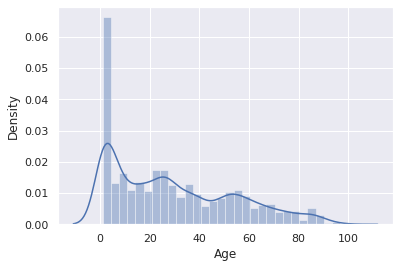

In [64]:
sns.set_theme()
sns.distplot(df['Age'],kde=True,bins=30)

In [65]:
nhohon4=[]
for i in range(len(df)):
  if(df['Age'].iloc[i]<=4):
    nhohon4.append(df['Age'].iloc[i])
nhohon4=pd.DataFrame(nhohon4)
nhohon4=nhohon4.sample(frac=0.3)
df=df[df['Age']>4]
df=pd.concat([df,nhohon4],ignore_index=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


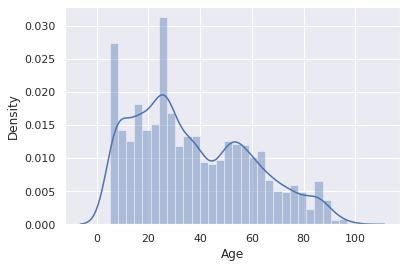

In [66]:
sns.distplot(df['Age'],kde=True,bins=30)

In [67]:
df=df[df['Age']<85]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


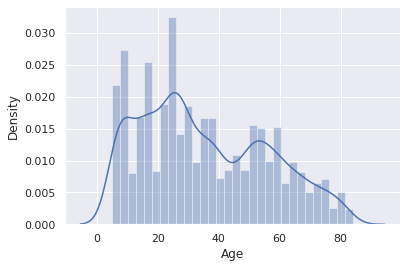

In [68]:
sns.distplot(df['Age'],kde=True,bins=30)

In [69]:
x=[]
y=[]
for i in range(len(df)):
    df['Images'].iloc[i]=df['Images'].iloc[i].resize((200,200),Image.ANTIALIAS)
    array=np.asarray(df['Images'].iloc[i])
    x.append(array)
    y.append(int(df['Age'].iloc[i]))
x=np.array(x)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [70]:
y_age=df['Age']
x_train,x_validation,y_train,y_validation = train_test_split(x,y_age,test_size=0.2,stratify=y_age)

In [71]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding="same", activation="relu",input_shape=(200,200,3)))
model.add(Conv2D(32, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), padding="same", activation='relu'))
model.add(Conv2D(128, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, (3,3), padding="same", activation='relu'))
model.add(Conv2D(256, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(1,activation="relu"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_156 (Conv2D)         (None, 200, 200, 32)      896       
                                                                 
 conv2d_157 (Conv2D)         (None, 200, 200, 32)      9248      
                                                                 
 max_pooling2d_78 (MaxPoolin  (None, 100, 100, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_158 (Conv2D)         (None, 100, 100, 64)      18496     
                                                                 
 conv2d_159 (Conv2D)         (None, 100, 100, 64)      36928     
                                                                 
 max_pooling2d_79 (MaxPoolin  (None, 50, 50, 64)       0         
 g2D)                                                 

In [72]:
model.compile(optimizer=Adam(lr=0.001),loss='mean_squared_error')
model_path='drive/MyDrive/baithi/model/age.h5'
checkpointer = ModelCheckpoint(model_path, monitor='loss',verbose=1,save_best_only=True,
                               save_weights_only=False, mode='auto',save_freq='epoch')
callback_list=[checkpointer]

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [73]:
kieuhinh_train=ImageDataGenerator(rescale=1./255,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
kieuhinh_validation=ImageDataGenerator(rescale=1./255)
training_data = kieuhinh_train.flow(x_train,y_train,batch_size=32)
validation_data=kieuhinh_validation.flow(x_validation,y_validation)

In [74]:
history=model.fit(training_data,epochs=40,verbose=1,validation_data=validation_data, shuffle=True,callbacks=[callback_list])

Epoch 1/40
183/183 [==============================] - ETA: 0s - loss: 478.7523
Epoch 1: loss improved from inf to 478.75226, saving model to drive/MyDrive/baithi/model/age.h5
183/183 [==============================] - 44s 238ms/step - loss: 478.7523 - val_loss: 420.9187
Epoch 2/40
183/183 [==============================] - ETA: 0s - loss: 426.1614
Epoch 2: loss improved from 478.75226 to 426.16138, saving model to drive/MyDrive/baithi/model/age.h5
183/183 [==============================] - 45s 246ms/step - loss: 426.1614 - val_loss: 392.2147
Epoch 3/40
183/183 [==============================] - ETA: 0s - loss: 395.6130
Epoch 3: loss improved from 426.16138 to 395.61298, saving model to drive/MyDrive/baithi/model/age.h5
183/183 [==============================] - 45s 246ms/step - loss: 395.6130 - val_loss: 317.7416
Epoch 4/40
183/183 [==============================] - ETA: 0s - loss: 341.9409
Epoch 4: loss improved from 395.61298 to 341.94089, saving model to drive/MyDrive/baithi/model/a

In [75]:
model_gender=load_model('drive/MyDrive/baithi/model/age.h5')

In [76]:
pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
#khai báo thư viện
import cv2
import matplotlib.pyplot as plt
from mtcnn import MTCNN

In [86]:
image_path='drive/MyDrive/baithi/age_data/test/woman2.jpg'

1: 14


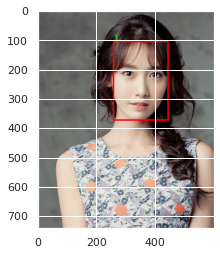

In [87]:
img=plt.imread(image_path)
detector=MTCNN() ## THU VIEN DA TRAIN SAN
faces=detector.detect_faces(img)
i=0
for face in faces:
  i = i+1
  x,y,w,h=face['box']
  img_cat=img[y:y+h,x:x+w]
  img_cat=np.resize(img_cat, (200,200,3))
  cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
  img_cat=img_cat.astype('float32')
  img_cat/=255
  output_gender=int(model_gender.predict(img_cat.reshape(-1,200,200,3)))
  output_str = str(i) + ": "+  str(output_gender)
  print(output_str)
  col = (0,255,0)
  cv2.putText(img, str(i),(x,y),cv2.FONT_HERSHEY_SIMPLEX,1,col,2)
plt.imshow(img)